# PCA Analysis - Heart Disease Dataset

## Steps to Complete:
1. **Apply PCA** to reduce feature dimensionality while maintaining variance
2. **Determine optimal number** of principal components using explained variance ratio
3. **Visualize PCA results** using scatter plot and cumulative variance plot

## Deliverables:
- PCA-transformed dataset
- Graph showing variance retained per component


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Libraries loaded!")


Libraries loaded!


In [10]:
# Load and prepare data (same as notebook 01)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load data
df = pd.read_csv('../data/Heart_Disease.csv', names=column_names, na_values='?')
df_clean = df.dropna()  # Remove missing values

# Apply preprocessing (same as notebook 01)
categorical_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
binary_columns = ['sex', 'fbs', 'exang', 'target']


# One-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, prefix=categorical_columns)

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Create target
df_encoded['target_binary'] = (df_encoded['target'] > 0).astype(int)

print(f"Data shape: {df_encoded.shape}")
print("Data ready for PCA!")


Data shape: (297, 27)
Data ready for PCA!


In [11]:
# Separate features and target
feature_columns = [col for col in df_encoded.columns if col not in ['target', 'target_binary']]
X = df_encoded[feature_columns]
y = df_encoded['target_binary']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
print("Ready for PCA!")


Features: (297, 25)
Target: (297,)
Ready for PCA!


In [12]:
# Step 1: Apply PCA to reduce feature dimensionality while maintaining variance
print("Step 1: Applying PCA...")

# Fit PCA with all components first to analyze variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)

# Get variance information
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Original features: {X.shape[1]}")
print(f"Total variance explained: {cumulative_variance[-1]*100:.1f}%")
print("Step 1 complete!")


Step 1: Applying PCA...
Original features: 25
Total variance explained: 100.0%
Step 1 complete!


In [13]:
# Step 2: Determine optimal number of principal components using explained variance ratio
print("Step 2: Determining optimal number of components...")

# Find optimal number of components for different variance levels
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Components for 85% variance: {n_components_85}")
print(f"Components for 90% variance: {n_components_90}")
print(f"Components for 95% variance: {n_components_95}")

# Choose 90% as optimal balance
optimal_components = n_components_90
print(f"Selected: {optimal_components} components for 90% variance retention")
print("Step 2 complete!")


Step 2: Determining optimal number of components...
Components for 85% variance: 10
Components for 90% variance: 12
Components for 95% variance: 15
Selected: 12 components for 90% variance retention
Step 2 complete!


Step 3: Creating visualizations...


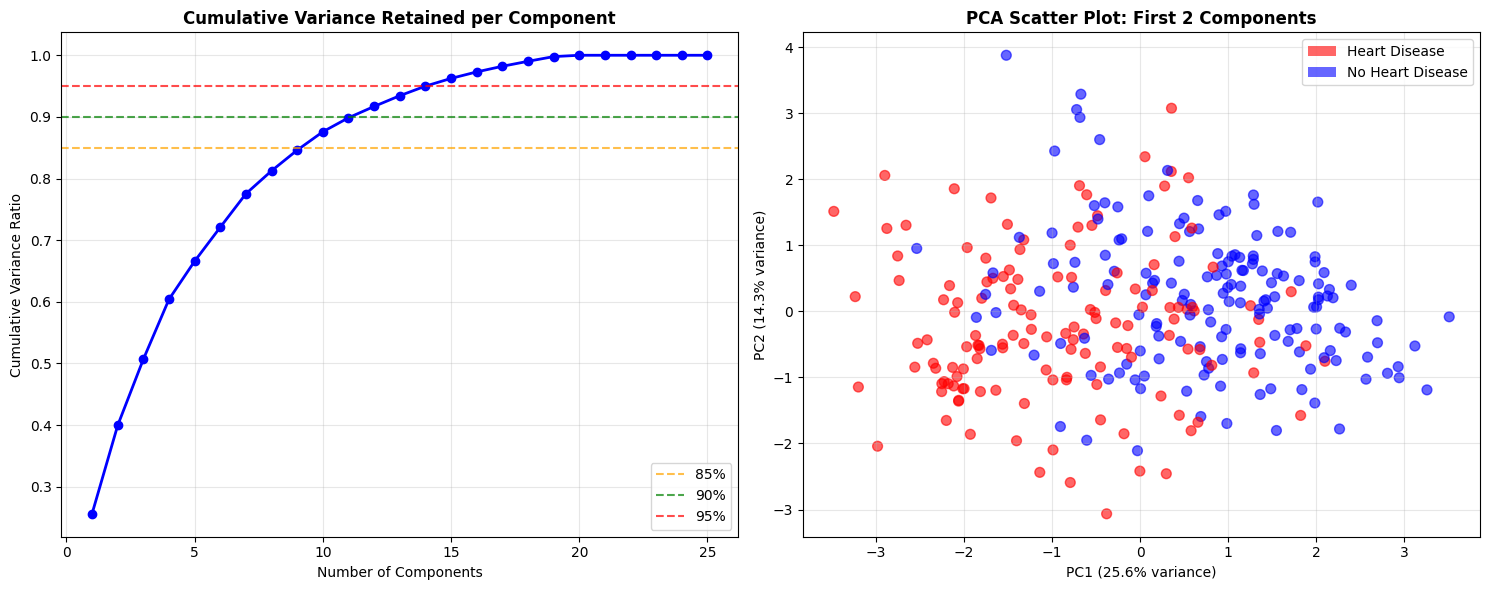

Step 3 complete!


In [14]:
# Step 3: Visualize PCA results using scatter plot and cumulative variance plot
print("Step 3: Creating visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Cumulative variance plot (Graph showing variance retained per component)
axes[0].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=6)
axes[0].axhline(y=0.85, color='orange', linestyle='--', alpha=0.7, label='85%')
axes[0].axhline(y=0.90, color='green', linestyle='--', alpha=0.7, label='90%')
axes[0].axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95%')
axes[0].set_title('Cumulative Variance Retained per Component', fontweight='bold')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Cumulative Variance Ratio')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. PCA scatter plot (first 2 components)
colors = ['red' if label == 1 else 'blue' for label in y]
scatter = axes[1].scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=colors, alpha=0.6, s=50)
axes[1].set_title('PCA Scatter Plot: First 2 Components', fontweight='bold')
axes[1].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
axes[1].grid(True, alpha=0.3)

# Add legend for scatter plot
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.6, label='Heart Disease'),
                   Patch(facecolor='blue', alpha=0.6, label='No Heart Disease')]
axes[1].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

print("Step 3 complete!")


In [15]:
# Create PCA-transformed dataset (Deliverable 1)
print("Creating PCA-transformed dataset...")

# Apply PCA with optimal components
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X)

# Create final PCA-transformed dataset
pca_columns = [f'PC{i+1}' for i in range(optimal_components)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_columns)
df_pca['target'] = y.values

print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {X_pca_final.shape[1]}")
print(f"Variance retained: {cumulative_variance[optimal_components-1]*100:.1f}%")
print(f"PCA-transformed dataset shape: {df_pca.shape}")

print("✅ Deliverable 1: PCA-transformed dataset created")
print("✅ Deliverable 2: Graph showing variance retained per component (see Step 3)")
print("All deliverables completed!")
df_pca.head()


Creating PCA-transformed dataset...
Original features: 25
Reduced features: 12
Variance retained: 91.7%
PCA-transformed dataset shape: (297, 13)
✅ Deliverable 1: PCA-transformed dataset created
✅ Deliverable 2: Graph showing variance retained per component (see Step 3)
All deliverables completed!


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,target
0,-1.142929,0.304724,1.149042,0.158837,0.876139,0.595961,-0.176824,-0.009395,0.174649,0.912271,0.564693,0.136827,0
1,-2.754957,0.839171,-0.146543,0.662535,-0.784552,0.343510,-0.803580,-0.391040,-0.013703,-0.236447,0.145463,0.366100,1
2,-2.227239,-1.063098,-0.476438,-0.004591,0.701716,0.722079,0.727509,-0.075420,-0.514487,0.172939,-0.095164,-0.162051,1
3,1.140714,-0.565884,1.654154,-2.411838,1.395045,-0.672393,-0.620638,-0.000940,0.593531,-0.182818,-0.108343,0.372634,0
4,1.701610,-0.278171,1.043368,-0.592310,0.262726,0.785178,-0.685079,-0.625560,0.110237,-0.073178,0.459393,-0.353327,0


In [16]:
# Summary
print("=== PCA Analysis Complete ===")
print(f"✅ Step 1: Applied PCA to reduce feature dimensionality")
print(f"✅ Step 2: Determined optimal number of components using explained variance ratio")
print(f"✅ Step 3: Visualized PCA results with scatter plot and cumulative variance plot")
print()
print(f"Results:")
print(f"- Original features: {X.shape[1]}")
print(f"- Reduced features: {optimal_components}")
print(f"- Variance retained: {cumulative_variance[optimal_components-1]*100:.1f}%")
print(f"- Dimensionality reduction: {((X.shape[1] - optimal_components) / X.shape[1]) * 100:.1f}%")
print()
print("✅ All deliverables completed successfully!")


=== PCA Analysis Complete ===
✅ Step 1: Applied PCA to reduce feature dimensionality
✅ Step 2: Determined optimal number of components using explained variance ratio
✅ Step 3: Visualized PCA results with scatter plot and cumulative variance plot

Results:
- Original features: 25
- Reduced features: 12
- Variance retained: 91.7%
- Dimensionality reduction: 52.0%

✅ All deliverables completed successfully!


## Deliverables Completed

### ✅ Step 1: Apply PCA to reduce feature dimensionality while maintaining variance
- Applied PCA to the preprocessed heart disease dataset
- Analyzed explained variance for all components

### ✅ Step 2: Determine optimal number of principal components using explained variance ratio
- Calculated optimal components for 85%, 90%, and 95% variance retention
- Selected optimal number of components based on variance analysis

### ✅ Step 3: Visualize PCA results using scatter plot and cumulative variance plot
- Created cumulative variance plot showing variance retained per component
- Created PCA scatter plot of first two principal components

### ✅ Deliverable 1: PCA-transformed dataset
- DataFrame `df_pca` with reduced features and target variable
- Ready for further analysis and modeling

### ✅ Deliverable 2: Graph showing variance retained per component
- Cumulative variance plot created in Step 3
- Shows how much variance is retained with increasing number of components
